<h1 align="center">The Battle of Neighborhoods</h1>

## Background

Real estate buyers searching for a new home always face big decisions. There are lots of factors effecting where to buy, such as the trend of price growth, local amenities and other factors which might make negative effects on the property value. London, the capital and largest city of England and the United Kingdom, is one of the world's most important global cities. London's population is about 9 million which accounts for 13.4% of the U.K. population. Also, London has a diverse range of people and full of different cultures. London attracts people from all over the world. According to the Guardian, all areas of the country in the U.K. recorded growth, with London prices increasing by 7.3%.



## Problem Description

How to decide which neighborhood in London the property is worth to buy? For those who want to buy real estate in London, it’s hard to know where to start.

## Taget Audience

This project aims to make an analysis of features for buyers who want to find and purchase property in London. The buyers can target at the features including median housing price, local private rental market and loacal facilities in each borough to decide where is the best neighborhood to buy.

## Datasets

The datasets will include the following data:
1. <b> London boroughs </b>
    <br> Source: https://en.wikipedia.org/wiki/List_of_London_boroughs
    - The data will be scraped from web url.
    - Selected columns: borough, population, coordinates
<br><br>
2. <b> Private Rental Market in London: January to December 2020 </b>
    <br> Source: https://www.ons.gov.uk/peoplepopulationandcommunity/housing/adhocs/12871privaterentalmarketinlondonjanuarytodecember2020
    - The data we will use is mean price.
    - Selected columns: Borough, Bedroom Category, Mean
<br><br>
3. <b> London Average House Prices </b>
    <br> Source: https://data.london.gov.uk/dataset/average-house-prices
    - The Year we will use is 2017.
    - Selected columns: Area, Year, Measure, Value
<br><br>
4. <b> Foursquare location data </b>
    <br> Source: https://foursquare.com

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li style="color:black; font-size:120%">Get Data</li>
            <ol>
                <li>Get London Boroughs Data</li>
                <li>Get London Rental Market Data</li>
                <li>Get London Average House Prices</li>
                <li>Merge Data</li>
            </ol>
        <br>
        <li style="color:black; font-size:120%">Mapping</li>
            <ol>
                <li>London Map</li>
                <li>Get the Foursquare Location Data</li>
                <li>London Venue Exploration</li> 
            </ol>
        <br>
        <li style="color:black; font-size:120%">Clustering</li>
            <ol>
                <li>Clustering with Sale Price</li>
                <li>Clustering with Rent Price</li>
            </ol>   
    </ul>
</div>
<br>
<hr>


In [83]:
# For manipulation and web scraping
!pip install bs4
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

# For geocoding
!pip install geopy
from geopy.geocoders import Nominatim 

<h1 id="borough_dataset">Get London Boroughs Data</h1>

In [84]:
url_Boroughs = 'https://en.wikipedia.org/wiki/List_of_London_boroughs'
html_Boroughs = requests.get(url_Boroughs).text
soup_Boroughs = BeautifulSoup(html_Boroughs, 'html.parser')
table_Boroughs = soup_Boroughs.find('table')

In [85]:
Borough_data = pd.DataFrame(columns=["Borough", "Coordinates"])
#Borough_data = pd.DataFrame(columns=["Borough", "Population", "Coordinates"])

#Get all rows from the table
for row in table_Boroughs.find_all('tr')[1:]: # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    Borough = cols[0].text.replace("[note 1]", "").replace("[note 2]", "").replace("[note 4]", "").strip()
    #Population = cols[7].text .strip()
    Coordinates = cols[8].text.strip()
    Borough_data = Borough_data.append({"Borough":Borough, "Coordinates":Coordinates}, ignore_index=True)
    
Borough_data

,Borough,Coordinates
0,Barking and Dagenham,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...
5,Camden,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W﻿ /...
6,Croydon,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W﻿ /...
7,Ealing,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W﻿ /...
8,Enfield,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W﻿ /...
9,Greenwich,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E﻿ /...


We need to transform the coordinates into Latitude and Longitude for further mapping.

In [86]:
geolocator = Nominatim(user_agent="London_explorer")
Borough_data['Coordinate']= Borough_data['Borough'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
Borough_data[['Latitude', 'Longitude']] = Borough_data['Coordinate'].apply(pd.Series)
Borough_data = Borough_data.drop(['Coordinate','Coordinates'], axis=1)
#Borough_data['Population'] = Borough_data['Population'].str.replace(",", "")
Borough_data

,Borough,Latitude,Longitude
0,Barking and Dagenham,51.554117,0.150504
1,Barnet,51.653090,-0.200226
2,Bexley,39.969238,-82.936864
3,Brent,32.937346,-87.164718
4,Bromley,51.402805,0.014814
5,Camden,39.944840,-75.119891
6,Croydon,51.371305,-0.101957
7,Ealing,51.512655,-0.305195
8,Enfield,53.430836,-2.960910
9,Greenwich,51.482084,-0.004542


It was found the Latitude and Longitude of Enfield & Tower Hamlets were not corretly corresponding after mapping, so I go back to this stage and update the correct data.

In [87]:
# Enfield 51.654827, -0.083599
# Tower Hamlets 51.5167, -0.0500.
Borough_data.loc[Borough_data['Borough'] == 'Enfield', 'Latitude'] = 51.654827
Borough_data.loc[Borough_data['Borough'] == 'Enfield', 'Longitude'] = -0.083599
Borough_data.loc[Borough_data['Borough'] == 'Tower Hamlets', 'Latitude'] = 51.5167
Borough_data.loc[Borough_data['Borough'] == 'Tower Hamlets', 'Longitude'] = -0.0500

In [88]:
Borough_data.query('Borough == "Enfield" | Borough == "Tower Hamlets"')

,Borough,Latitude,Longitude
8,Enfield,51.654827,-0.083599
28,Tower Hamlets,51.516700,-0.050000


Now the coordinates are correct.

In [89]:
Borough_data.shape

(32, 3)

<h1 id="rent_dataset">Get London Rental Market Data</h1>



In [90]:
Rent_data = pd.read_csv('LondonRent.csv')
# Borough,Bedroom Category,Mean
Rent_data.rename(columns = {'Bedroom Category':'Category'}, inplace = True)
Rent_data.head(10)

,Borough,Category,Count of rents,Mean,Lower quartile,Median,Upper quartile
0,Barking and Dagenham,Room,20.0,859.0,542.0,692.0,792.0
1,Barking and Dagenham,Studio,10.0,792.0,750.0,800.0,850.0
2,Barking and Dagenham,One Bedroom,150.0,990.0,900.0,1000.0,1050.0
3,Barking and Dagenham,Two Bedrooms,220.0,1220.0,1150.0,1200.0,1300.0
4,Barking and Dagenham,Three Bedrooms,150.0,1438.0,1300.0,1400.0,1550.0
5,Barking and Dagenham,Four or More Bedrooms,30.0,1695.0,1600.0,1700.0,1850.0
6,Barnet,Studio,60.0,916.0,823.0,900.0,1000.0
7,Barnet,One Bedroom,380.0,1162.0,1050.0,1150.0,1250.0
8,Barnet,Two Bedrooms,770.0,1404.0,1300.0,1400.0,1500.0
9,Barnet,Three Bedrooms,260.0,1797.0,1603.0,1798.0,1950.0


We will only need the data of mean rent price, so drop the columns we don't need and get a summary.

In [91]:
del Rent_data['Count of rents']
Rent_data.drop(Rent_data.loc[:, 'Lower quartile':], inplace = True, axis = 1)
Rent_data = pd.pivot_table(Rent_data, values = 'Mean', index='Borough', columns = 'Category').reset_index()
Rent_data.head()

Category,Borough,Four or More Bedrooms,One Bedroom,Room,Studio,Three Bedrooms,Two Bedrooms
0,Barking and Dagenham,1695.0,990.0,859.0,792.0,1438.0,1220.0
1,Barnet,2529.0,1162.0,NaN,916.0,1797.0,1404.0
2,Bexley,1758.0,853.0,495.0,698.0,1294.0,1112.0
3,Brent,2279.0,1176.0,621.0,904.0,1850.0,1452.0
4,Bromley,2321.0,1001.0,549.0,775.0,1589.0,1262.0


In [92]:
Rent_data.shape

(33, 7)

<h1 id="house_dataset">Get London Average House Prices</h1>

In [93]:
House_data = pd.read_csv('land-registry-house-prices-borough.csv')
del House_data['Code']
House_data.rename(columns = {'Area':'Borough'}, inplace = True)
House_data.head()

,Borough,Year,Measure,Value
0,City of London,Year ending Dec 1995,Median,"105,000"
1,Barking and Dagenham,Year ending Dec 1995,Median,"49,000"
2,Barnet,Year ending Dec 1995,Median,"85,125"
3,Bexley,Year ending Dec 1995,Median,"62,000"
4,Brent,Year ending Dec 1995,Median,"68,000"


We need to remove those marks and years we don't need. Make it a clean data. The year will be used is the latest data in 2017 and the measure we will use the mean measure.

In [94]:
House_data['Value'] = House_data['Value'].str.replace(",", "")
House_data = House_data.query('Year == "Year ending Dec 2017" & Measure == "Mean"').reset_index(drop=True)
House_data['Year'] = House_data['Year'].str[-4:]
House_data.rename(columns = {'Value':'2017_MeanPrice'}, inplace = True)
House_data.drop(House_data.loc[:, 'Year':'Measure'], inplace = True, axis = 1)
House_data.head()

,Borough,2017_MeanPrice
0,City of London,950760
1,Barking and Dagenham,301518
2,Barnet,667593
3,Bexley,357779
4,Brent,578705


In [95]:
House_data.shape

(45, 2)

<h1 id="merge_dataset">Merge Data</h1>

Hear we are going to produce three datasets
- data_merged_RENT: a full data set with Population, Latitude, Longitude and rent price.
- data_merged_SALE: a full data set with Population, Latitude, Longitude and sale price.
- data_merged_BOTH: a full data set with Population, Latitude, Longitude and both rent & sale price.

In [96]:
data_merged_RENT = Borough_data.merge(Rent_data, on='Borough')
data_merged_RENT.head()

,Borough,Latitude,Longitude,Four or More Bedrooms,One Bedroom,Room,Studio,Three Bedrooms,Two Bedrooms
0,Barking and Dagenham,51.554117,0.150504,1695.0,990.0,859.0,792.0,1438.0,1220.0
1,Barnet,51.653090,-0.200226,2529.0,1162.0,NaN,916.0,1797.0,1404.0
2,Bexley,39.969238,-82.936864,1758.0,853.0,495.0,698.0,1294.0,1112.0
3,Brent,32.937346,-87.164718,2279.0,1176.0,621.0,904.0,1850.0,1452.0
4,Bromley,51.402805,0.014814,2321.0,1001.0,549.0,775.0,1589.0,1262.0


In [97]:
data_merged_RENT.shape

(32, 9)

In [98]:
data_merged_SALE = Borough_data.merge(House_data, on='Borough')
data_merged_SALE.head()

,Borough,Latitude,Longitude,2017_MeanPrice
0,Barking and Dagenham,51.554117,0.150504,301518
1,Barnet,51.653090,-0.200226,667593
2,Bexley,39.969238,-82.936864,357779
3,Brent,32.937346,-87.164718,578705
4,Bromley,51.402805,0.014814,502623


In [99]:
data_merged_SALE.shape

(32, 4)

<h1 id="london_map">London Map</h1>

Install the library for mapping

In [100]:
! pip install folium==0.5.0
import folium # plotting library

In [101]:
address = 'London'
geolocator = Nominatim(user_agent="London_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [103]:
# create map of Toronto using latitude and longitude values
map_London = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(Borough_data['Latitude'], Borough_data['Longitude'], Borough_data['Borough']):
    label = 'Borough: {}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 8,
        popup=label,
        color='#2F97C1',
        fill=True,
        fill_color='#2F97C1',
        fill_opacity=0.5,
        parse_html=False).add_to(map_London)  
    
map_London

<h1 id="Foursquare">Get the Foursquare Location Data</h1>

Retreive Foursquare information.

In [104]:
CLIENT_ID = 'IEWFAFLUUSE0LTN5LUQOYARSU13XUZXNGLHL3LPZJTUUOJXG' # your Foursquare ID
CLIENT_SECRET = 'AWFX1LKFB2P030S134BWSAXOUHQSYCZAEBRJ2C1RZV15NPT0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [105]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Get London venues

In [106]:
# type your answer here
London_venues = getNearbyVenues(
                                    names=Borough_data['Borough'],
                                    latitudes=Borough_data['Latitude'],
                                    longitudes=Borough_data['Longitude']
                                  )


Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [107]:
print(London_venues.shape)
London_venues.head()

(1176, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.554117,0.150504,Tesco Express,51.551536,0.152784,Grocery Store
1,Barking and Dagenham,51.554117,0.150504,Connor Road Bus Stop,51.554345,0.147162,Bus Stop
2,Barking and Dagenham,51.554117,0.150504,Oglethorpe Road Bus Stop,51.555221,0.147136,Bus Stop
3,Barking and Dagenham,51.554117,0.150504,Five Elms Off Licence,51.553878,0.145531,Liquor Store
4,Barnet,51.653090,-0.200226,Ye Old Mitre Inne,51.652940,-0.199507,Pub


We can explore in which borough having the most of the venues.
<br> Let's see the top 5 borough.

In [108]:
London_venues_count = London_venues[['Borough','Venue']].groupby('Borough', as_index=False).count()
#London_venues_count.sort_values('Venue', ascending=False).head()
London_venues_count = London_venues_count.sort_values('Venue', ascending=False).head()
#",".join(London_venues_count['Borough'].unique())
print('Top 5 boroughs with the most venues are {}.'.format(", ".join(London_venues_count['Borough'].unique())))

Top 5 boroughs with the most venues are Southwark, Kingston upon Thames, Ealing, Hammersmith and Fulham, Islington.


In [109]:
# one hot encoding
venues_onehot = pd.get_dummies(London_venues[['Venue Category']], prefix="", prefix_sep="")

# add Borough column back to dataframe
venues_onehot['Borough'] = London_venues['Borough'] 

# move Borough column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])

#fixed_columns
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barnet,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
london_groupedVenues = venues_onehot.groupby('Borough').mean().reset_index()
london_groupedVenues.head()

,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Barking and Dagenham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Barnet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bexley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Brent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bromley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023256,...,0.023256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
london_groupedVenues.shape

(32, 215)

Now we have a dataset [london_groupedVenues] wtih vanues in each London borough. Then we will use this data to compare rent price, sale price for further clustering.

<h1 id="exploration">London Venue Exploration</h1>

What are the top 5 venues/facilities nearby profitable real estate investments?

In [112]:
num_top_venues = 5

for hood in london_groupedVenues['Borough']:
    print("----"+hood+"----")
    temp = london_groupedVenues[london_groupedVenues['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
               venue  freq
0           Bus Stop  0.50
1       Liquor Store  0.25
2      Grocery Store  0.25
3  Afghan Restaurant  0.00
4       Noodle House  0.00


----Barnet----
               venue  freq
0        Coffee Shop  0.16
1                Pub  0.09
2               Park  0.06
3  Convenience Store  0.06
4           Pharmacy  0.06


----Bexley----
                        venue  freq
0                        Park   1.0
1           Afghan Restaurant   0.0
2                Noodle House   0.0
3           Mobile Phone Shop   0.0
4  Modern European Restaurant   0.0


----Brent----
                        venue  freq
0           Convenience Store   0.5
1                Chiropractor   0.5
2           Afghan Restaurant   0.0
3                Optical Shop   0.0
4  Modern European Restaurant   0.0


----Bromley----
                  venue  freq
0        Clothing Store  0.14
1           Coffee Shop  0.12
2  Gym / Fitness Center  0.07
3                   Pub  0.

In [113]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [114]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
borough_venues_sorted = pd.DataFrame(columns=columns)
borough_venues_sorted['Borough'] = london_groupedVenues['Borough']

for ind in np.arange(london_groupedVenues.shape[0]):
    borough_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_groupedVenues.iloc[ind, :], num_top_venues)

borough_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Bus Stop,Liquor Store,Grocery Store,Afghan Restaurant,Noodle House,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum
1,Barnet,Coffee Shop,Pub,Park,Convenience Store,Pharmacy,Fast Food Restaurant,Restaurant,Construction & Landscaping,Grocery Store,Metro Station
2,Bexley,Park,Afghan Restaurant,Noodle House,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue
3,Brent,Convenience Store,Chiropractor,Afghan Restaurant,Optical Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue
4,Bromley,Clothing Store,Coffee Shop,Gym / Fitness Center,Pub,Burger Joint,Portuguese Restaurant,Pizza Place,Fast Food Restaurant,Gelato Shop,Sushi Restaurant


### A. Venues & Sales Price

In [115]:
london_SALE_Cluster = london_groupedVenues.merge(data_merged_SALE, on='Borough')
london_SALE_Cluster.drop(london_SALE_Cluster.loc[:, 'Latitude':'Longitude'], inplace = True, axis = 1)
london_SALE_Cluster.head()


,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,2017_MeanPrice
0,Barking and Dagenham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,301518
1,Barnet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,667593
2,Bexley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,357779
3,Brent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,578705
4,Bromley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,502623


In [116]:
!pip install -U scikit-learn
#!pip install bs4

In [117]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

<h1 id="cluster_house">Clustering with Sale Price</h1>

In [118]:
# Prepare the dataset for clustering
london_SALE_Clustering = london_SALE_Cluster.drop('Borough', 1)
london_SALE_Clustering.head()

,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,2017_MeanPrice
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,301518
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,667593
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,357779
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,578705
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023256,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,502623


In [119]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
london_SALE_Clustering = StandardScaler().fit_transform(london_SALE_Clustering)
london_SALE_Clustering

array([[-0.19808676, -0.1796053 , -0.2387585 , ..., -0.1796053 ,
        -0.23436624, -0.96185168],
       [-0.19808676, -0.1796053 , -0.2387585 , ..., -0.1796053 ,
        -0.23436624,  0.03007273],
       [-0.19808676, -0.1796053 , -0.2387585 , ..., -0.1796053 ,
        -0.23436624, -0.80940571],
       ...,
       [-0.19808676, -0.1796053 , -0.2387585 , ..., -0.1796053 ,
        -0.23436624, -0.53263692],
       [-0.19808676, -0.1796053 , -0.2387585 , ..., -0.1796053 ,
        -0.23436624,  0.43881901],
       [-0.19808676, -0.1796053 , -0.2387585 , ..., -0.1796053 ,
        -0.23436624,  2.8766133 ]])

In [120]:
from sklearn.metrics import silhouette_score
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(london_SALE_Clustering)
    score = silhouette_score(london_SALE_Clustering, kmeans.labels_)
    silhouette_coefficients.append(score)

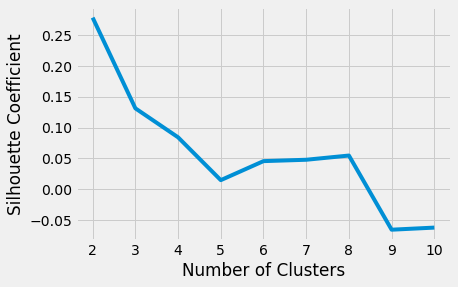

In [121]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

The best number of K is 2.

In [122]:
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_SALE_Clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [123]:
borough_venues_sorted_SALE = borough_venues_sorted.merge(data_merged_SALE, on='Borough')

# add clustering labels
borough_venues_sorted_SALE['Cluster Labels'] = kmeans.labels_

borough_venues_sorted_SALE.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude,2017_MeanPrice,Cluster Labels
0,Barking and Dagenham,Bus Stop,Liquor Store,Grocery Store,Afghan Restaurant,Noodle House,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,51.554117,0.150504,301518,1
1,Barnet,Coffee Shop,Pub,Park,Convenience Store,Pharmacy,Fast Food Restaurant,Restaurant,Construction & Landscaping,Grocery Store,Metro Station,51.653090,-0.200226,667593,1
2,Bexley,Park,Afghan Restaurant,Noodle House,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,39.969238,-82.936864,357779,1
3,Brent,Convenience Store,Chiropractor,Afghan Restaurant,Optical Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,32.937346,-87.164718,578705,1
4,Bromley,Clothing Store,Coffee Shop,Gym / Fitness Center,Pub,Burger Joint,Portuguese Restaurant,Pizza Place,Fast Food Restaurant,Gelato Shop,Sushi Restaurant,51.402805,0.014814,502623,1


In [124]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [125]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)
# add title
loc = 'Cluster with Sale Price'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc) 

    

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, price in zip(borough_venues_sorted_SALE['Latitude'], borough_venues_sorted_SALE['Longitude'], borough_venues_sorted_SALE['Borough'], borough_venues_sorted_SALE['Cluster Labels'], borough_venues_sorted_SALE['2017_MeanPrice']):
    label = folium.Popup(str(poi) + ' Cluster: ' + str(cluster)  + ' Mean House Price: ' + str(price), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color= rainbow[cluster-1],
        fill=True,
        fill_color= rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters.get_root().html.add_child(folium.Element(title_html))

map_clusters

In [126]:
borough_venues_sorted_SALE.loc[borough_venues_sorted_SALE['Cluster Labels'] == 0, borough_venues_sorted_SALE.columns[[1] + list(range(5, borough_venues_sorted_SALE.shape[1]))]]

,1st Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude,2017_MeanPrice,Cluster Labels
9,Pub,Pier,Pizza Place,Burger Joint,Grocery Store,History Museum,Café,51.482084,-0.004542,462820,0


In [ ]:
borough_venues_sorted_SALE.loc[borough_venues_sorted_SALE['Cluster Labels'] == 1, borough_venues_sorted_SALE.columns[[1] + list(range(5, borough_venues_sorted_SALE.shape[1]))]]

<h1 id="rent_house">Clustering with Rent Price</h1>

In [127]:
london_RENT_Cluster = london_groupedVenues.merge(data_merged_RENT, on='Borough')
london_RENT_Cluster.drop(london_RENT_Cluster.loc[:, 'Latitude':'Longitude'], inplace = True, axis = 1)
london_RENT_Cluster.head()

,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Four or More Bedrooms,One Bedroom,Room,Studio,Three Bedrooms,Two Bedrooms
0,Barking and Dagenham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,1695.0,990.0,859.0,792.0,1438.0,1220.0
1,Barnet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,2529.0,1162.0,NaN,916.0,1797.0,1404.0
2,Bexley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,1758.0,853.0,495.0,698.0,1294.0,1112.0
3,Brent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,2279.0,1176.0,621.0,904.0,1850.0,1452.0
4,Bromley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023256,...,0.0,0.0,0.0,0.0,2321.0,1001.0,549.0,775.0,1589.0,1262.0


In [128]:
# Prepare the dataset for clustering
london_RENT_Clustering = london_RENT_Cluster.drop('Borough', 1).fillna(0)
# Standardize the data
from sklearn.preprocessing import StandardScaler
london_RENT_Clustering = StandardScaler().fit_transform(london_RENT_Clustering)
london_RENT_Clustering

array([[-0.19808676, -0.1796053 , -0.2387585 , ..., -0.86611642,
        -0.81080728, -0.85118688],
       [-0.19808676, -0.1796053 , -0.2387585 , ..., -0.23621357,
        -0.33803528, -0.43430214],
       [-0.19808676, -0.1796053 , -0.2387585 , ..., -1.34362342,
        -1.00044285, -1.0958801 ],
       ...,
       [-0.19808676, -0.1796053 , -0.2387585 , ..., -0.62736292,
        -0.53425541, -0.50453816],
       [-0.19808676, -0.1796053 , -0.2387585 , ...,  0.46480735,
         0.30461859,  0.49462582],
       [-0.19808676, -0.1796053 , -0.2387585 , ...,  1.79065125,
         2.82124061,  2.89624444]])

We used silhouette coefficient to determine how many clusters gave a best fit for the data.
The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

- How close the data point is to other points in the cluster
- How far away the data point is from points in other clusters

In [129]:
# Find K
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(london_RENT_Clustering)
    score = silhouette_score(london_RENT_Clustering, kmeans.labels_)
    silhouette_coefficients.append(score)

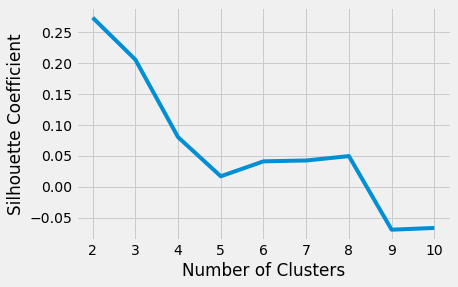

In [130]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

The best number of K gave us 2.

In [131]:
# set number of clusters
kclusters = 2

# run k-means clustering
kmeansR = KMeans(n_clusters=kclusters, random_state=0).fit(london_RENT_Clustering)

# check cluster labels generated for each row in the dataframe
kmeansR.labels_[0:50] 


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [132]:
borough_venues_sorted_RENT = borough_venues_sorted.merge(data_merged_RENT, on='Borough')

# add clustering labels
borough_venues_sorted_RENT['Cluster Labels'] = kmeansR.labels_

borough_venues_sorted_RENT.head()


,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude,Four or More Bedrooms,One Bedroom,Room,Studio,Three Bedrooms,Two Bedrooms,Cluster Labels
0,Barking and Dagenham,Bus Stop,Liquor Store,Grocery Store,Afghan Restaurant,Noodle House,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,51.554117,0.150504,1695.0,990.0,859.0,792.0,1438.0,1220.0,1
1,Barnet,Coffee Shop,Pub,Park,Convenience Store,Pharmacy,Fast Food Restaurant,Restaurant,Construction & Landscaping,Grocery Store,Metro Station,51.653090,-0.200226,2529.0,1162.0,NaN,916.0,1797.0,1404.0,1
2,Bexley,Park,Afghan Restaurant,Noodle House,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,39.969238,-82.936864,1758.0,853.0,495.0,698.0,1294.0,1112.0,1
3,Brent,Convenience Store,Chiropractor,Afghan Restaurant,Optical Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,32.937346,-87.164718,2279.0,1176.0,621.0,904.0,1850.0,1452.0,1
4,Bromley,Clothing Store,Coffee Shop,Gym / Fitness Center,Pub,Burger Joint,Portuguese Restaurant,Pizza Place,Fast Food Restaurant,Gelato Shop,Sushi Restaurant,51.402805,0.014814,2321.0,1001.0,549.0,775.0,1589.0,1262.0,1


In [133]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)
# add title
loc = 'Cluster with Rent'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(borough_venues_sorted_RENT['Latitude'], borough_venues_sorted_RENT['Longitude'], borough_venues_sorted_SALE['Borough'], borough_venues_sorted_RENT['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster: ' + str(cluster) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color= rainbow[cluster-1],
        fill=True,
        fill_color= rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters.get_root().html.add_child(folium.Element(title_html))
map_clusters

In [134]:
borough_venues_sorted_RENT.loc[borough_venues_sorted_RENT['Cluster Labels'] == 0, borough_venues_sorted_RENT.columns[[1] + list(range(5, borough_venues_sorted_RENT.shape[1]))]]

,1st Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude,Four or More Bedrooms,One Bedroom,Room,Studio,Three Bedrooms,Two Bedrooms,Cluster Labels
9,Pub,Pier,Pizza Place,Burger Joint,Grocery Store,History Museum,Café,51.482084,-0.004542,2079.0,1160.0,626.0,862.0,1684.0,1397.0,0


In [136]:
borough_venues_sorted_RENT.loc[borough_venues_sorted_RENT['Cluster Labels'] == 1, borough_venues_sorted_RENT.columns[[1] + list(range(5, borough_venues_sorted_RENT.shape[1]))]]

,1st Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude,Four or More Bedrooms,One Bedroom,Room,Studio,Three Bedrooms,Two Bedrooms,Cluster Labels
0,Bus Stop,Noodle House,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,51.554117,0.150504,1695.0,990.0,859.0,792.0,1438.0,1220.0,1
1,Coffee Shop,Pharmacy,Fast Food Restaurant,Restaurant,Construction & Landscaping,Grocery Store,Metro Station,51.653090,-0.200226,2529.0,1162.0,NaN,916.0,1797.0,1404.0,1
2,Park,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,39.969238,-82.936864,1758.0,853.0,495.0,698.0,1294.0,1112.0,1
3,Convenience Store,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,32.937346,-87.164718,2279.0,1176.0,621.0,904.0,1850.0,1452.0,1
4,Clothing Store,Burger Joint,Portuguese Restaurant,Pizza Place,Fast Food Restaurant,Gelato Shop,Sushi Restaurant,51.402805,0.014814,2321.0,1001.0,549.0,775.0,1589.0,1262.0,1
5,Pharmacy,Toll Plaza,Café,Light Rail Station,Park,Bar,Bank,39.944840,-75.119891,3796.0,1639.0,795.0,1072.0,2877.0,2264.0,1
6,Pub,Clothing Store,Caribbean Restaurant,Nightclub,Café,Spanish Restaurant,Burger Joint,51.371305,-0.101957,2004.0,968.0,546.0,773.0,1455.0,1218.0,1
7,Coffee Shop,Bakery,Bus Stop,Park,Burger Joint,Café,Italian Restaurant,51.512655,-0.305195,2820.0,1249.0,778.0,929.0,2016.0,1551.0,1
8,Pub,Department Store,Gift Shop,Pharmacy,Shopping Mall,Indian Restaurant,Bookstore,51.654827,-0.083599,2007.0,1002.0,NaN,826.0,1580.0,1306.0,1
10,Pub,Brewery,Butcher,Garden,Modern European Restaurant,Movie Theater,Sporting Goods Shop,51.543240,-0.049362,3147.0,1460.0,NaN,1031.0,2362.0,1793.0,1
